In [55]:
import jsonlines
from collections import defaultdict
import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [56]:
# import argparse
# parser = argparse.ArgumentParser(description='Description of your program')
# parser.add_argument('input_file')
# args = parser.parse_args()

In [57]:
from types import SimpleNamespace
args = SimpleNamespace()
# args.input_file = "/home/XXX/code/bug-benchmarks/oss-fuzz/first_run_xmls_dedup_sort.jsonl"
args.input_file = "/mnt/magi/basilisk-backup/Files/biggie/oss-fuzz/fuzz_10m_trace_3h/postprocessed_json/examples_sorted_clean.jsonl"

In [58]:
with open(args.input_file) as inf:
    num_lines = sum(1 for _ in inf)

with jsonlines.open(args.input_file) as inf:
    project_examples = []
    current_project = None
    projects = defaultdict(int)
    classes = defaultdict(int)
    for example in tqdm.tqdm(inf, total=num_lines, desc="measuring stats"):
        projects[example["project"]] += 1
        classes[example["class"]] += 1

measuring stats: 100%|██████████| 503947/503947 [00:21<00:00, 23531.20it/s]


unique projects: 33


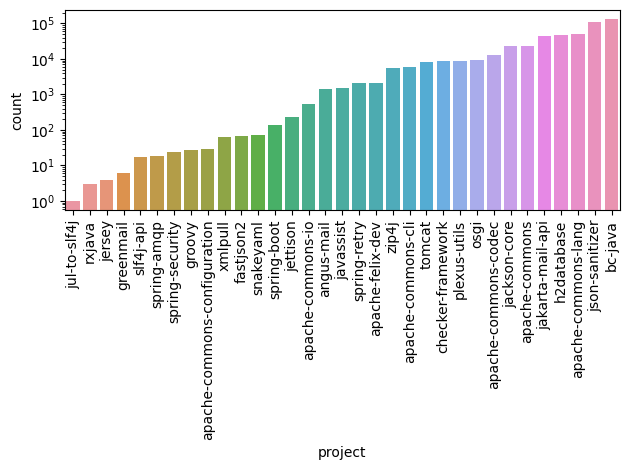

project
angus-mail                      0.030303
jersey                          0.030303
xmlpull                         0.030303
tomcat                          0.030303
spring-security                 0.030303
spring-retry                    0.030303
spring-boot                     0.030303
spring-amqp                     0.030303
snakeyaml                       0.030303
slf4j-api                       0.030303
rxjava                          0.030303
plexus-utils                    0.030303
osgi                            0.030303
jul-to-slf4j                    0.030303
json-sanitizer                  0.030303
jettison                        0.030303
javassist                       0.030303
apache-commons                  0.030303
jakarta-mail-api                0.030303
jackson-core                    0.030303
h2database                      0.030303
groovy                          0.030303
greenmail                       0.030303
fastjson2                       0.030303
checker-

In [59]:
print("unique projects:", len(projects))
df = pd.DataFrame(projects.items(), columns=["project", "count"]).sort_values("count")
sns.barplot(df, x="project", y="count")
plt.yscale("log")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df.value_counts("project", normalize=True)

unique classes: 181


<ipython-input-60-ecd2774454ad>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


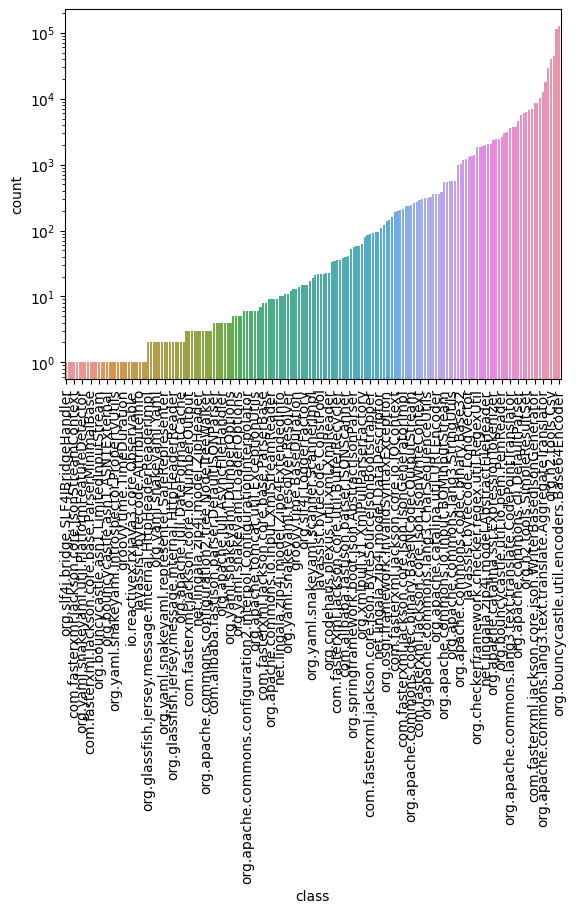

class
com.alibaba.fastjson.JSON                          0.005525
org.apache.juli.AsyncFileHandler                   0.005525
org.apache.juli.DateFormatCache                    0.005525
org.apache.juli.FileHandler                        0.005525
org.apache.juli.OneLineFormatter                   0.005525
                                                     ...   
net.lingala.zip4j.util.Zip4jUtil                   0.005525
org.apache.catalina.ssi.ExpressionParseTree        0.005525
org.apache.catalina.ssi.ExpressionTokenizer        0.005525
org.apache.catalina.ssi.SSIMediator                0.005525
org.yaml.snakeyaml.util.PlatformFeatureDetector    0.005525
Length: 181, dtype: float64

In [60]:
print("unique classes:", len(classes))
df = pd.DataFrame(classes.items(), columns=["class", "count"]).sort_values("count").reset_index(drop=True)
sns.barplot(df, x="class", y="count")
plt.yscale("log")
selected_ticks = df["class"][::len(df)//50]
plt.gca().set_xticks(selected_ticks.index)
plt.gca().set_xticklabels(selected_ticks.tolist(), rotation='vertical')
plt.tight_layout()
plt.show()
df.value_counts("class", normalize=True)